In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, chi2_contingency
from sklearn.metrics import roc_curve, auc
from google.colab import files
from scipy import stats

In [ ]:
# Upload csv file to colab for using it
upload_file = files.upload()

Saving Dai_sixth_task.csv to Dai_sixth_task (1).csv


In [ ]:
# Use the uploaded file in colab
ruf6 = pd.read_csv("Dai_sixth_task.csv")
ruf6.head()

,RUMD_MRU,False_tract_fistula
0,0.69,2
1,0.93,2
2,1.40,2
3,0.95,2
4,1.39,2


In [ ]:
# Check column names to ensure 'False_tract_fistula' is correctly referenced
print("Columns in DataFrame:", ruf6.columns)

# Strip any leading/trailing spaces from the column names to avoid referencing issues
ruf6.columns = ruf6.columns.str.strip()

Columns in DataFrame: Index(['RUMD_MRU', 'False_tract_fistula'], dtype='object')


In [ ]:
# Separate the data based on the False_tract_fistula value
False_tract_fistula_1 = ruf6[ruf6['False_tract_fistula'] == 1]
False_tract_fistula_2 = ruf6[ruf6['False_tract_fistula'] == 2]


# Remove 'False_tract_fistula' column from calculation
False_tract_fistula_1 = False_tract_fistula_1.drop(columns='False_tract_fistula')
False_tract_fistula_2 = False_tract_fistula_2.drop(columns='False_tract_fistula')


# Use describe function to get statistical summary for both groups
describe_steps_1 = False_tract_fistula_1.describe()
describe_steps_2 = False_tract_fistula_2.describe()


# Display the results
print("Statistical Summary for False tract fistula 1:")
print(describe_steps_1)

Statistical Summary for False tract fistula 1:
       RUMD_MRU
count  4.000000
mean   0.687500
std    0.193111
min    0.500000
25%    0.537500
50%    0.675000
75%    0.825000
max    0.900000


In [ ]:
# Display the results
print("Statistical Summary for False tract fistula 2:")
print(describe_steps_2)

Statistical Summary for False tract fistula 2:
        RUMD_MRU
count  16.000000
mean    1.033125
std     0.338521
min     0.540000
25%     0.765000
50%     0.975000
75%     1.240000
max     1.770000


In [ ]:
# Extract only count and mean for each False tract fistula
count_mean_steps_1 = describe_steps_1.loc[['count', 'mean']]
count_mean_steps_2 = describe_steps_2.loc[['count', 'mean']]

# Display the results
print("Count and Mean for False tract fistula 1:")
print(count_mean_steps_1)

print("\nCount and Mean for False tract fistula 2:")
print(count_mean_steps_2)

Count and Mean for False tract fistula 1:
       RUMD_MRU
count    4.0000
mean     0.6875

Count and Mean for False tract fistula 2:
        RUMD_MRU
count  16.000000
mean    1.033125


In [ ]:
# Calculate mean values for each False tract fistula
mean_steps_1 = count_mean_steps_1.loc['mean'].values[0]
mean_steps_2 = count_mean_steps_2.loc['mean'].values[0]

# Count the number of values less than and greater than the mean for each False tract fistula
less_than_mean_steps_1 = (False_tract_fistula_1['RUMD_MRU'] < mean_steps_1).sum()
greater_than_mean_steps_1 = (False_tract_fistula_1['RUMD_MRU'] > mean_steps_1).sum()

less_than_mean_steps_2 = (False_tract_fistula_2['RUMD_MRU'] < mean_steps_2).sum()
greater_than_mean_steps_2 = (False_tract_fistula_2['RUMD_MRU'] > mean_steps_2).sum()

# Display the results
print(f"\nFalse tract fistula = 1")
print(f"Number of values less than mean value(FN): {less_than_mean_steps_1}")
print(f"Number of values greater than mean value(TN): {greater_than_mean_steps_1}")

print(f"\nFalse tract fistula = 2")
print(f"Number of values less than mean value(TP): {less_than_mean_steps_2}")
print(f"Number of values greater than mean value(FP): {greater_than_mean_steps_2}")


False tract fistula = 1
Number of values less than mean value(FN): 2
Number of values greater than mean value(TN): 2

False tract fistula = 2
Number of values less than mean value(TP): 9
Number of values greater than mean value(FP): 7


In [ ]:
# Calculate the fixed threshold value
threshold_value = 1.01

# Count the number of values less than and greater than the fixed threshold for each False tract fistula
less_than_threshold_steps_1 = (False_tract_fistula_1['RUMD_MRU'] < threshold_value).sum()
greater_than_threshold_steps_1 = (False_tract_fistula_1['RUMD_MRU'] > threshold_value).sum()

less_than_threshold_steps_2 = (False_tract_fistula_2['RUMD_MRU'] < threshold_value).sum()
greater_than_threshold_steps_2 = (False_tract_fistula_2['RUMD_MRU'] > threshold_value).sum()

# Display the results
print(f"\nFalse tract fistula = 1")
print(f"Number of values less than threshold value (FN): {less_than_threshold_steps_1}")
print(f"Number of values greater than threshold value (TN): {greater_than_threshold_steps_1}")

print(f"\nFalse tract fistula = 2")
print(f"Number of values less than threshold value (TP): {less_than_threshold_steps_2}")
print(f"Number of values greater than threshold value (FP): {greater_than_threshold_steps_2}")


False tract fistula = 1
Number of values less than threshold value (FN): 4
Number of values greater than threshold value (TN): 0

False tract fistula = 2
Number of values less than threshold value (TP): 9
Number of values greater than threshold value (FP): 7


In [ ]:
from scipy import stats
# Perform Mann-Whitney U test comparing the two groups
from scipy.stats import mannwhitneyu
u_statistic, p_value = stats.mannwhitneyu(
    False_tract_fistula_1['RUMD_MRU'],
    False_tract_fistula_2['RUMD_MRU']
)

# Display the results
print("Mann-Whitney Result for Comparison of False tract fistula 1 and 2:")
print("RUMD_MRU vs False tract fistula 1 vs False tract fistula 2")
print("U Statistic:", u_statistic)
print("p-Value:", p_value)

Mann-Whitney Result for Comparison of False tract fistula 1 and 2:
RUMD_MRU vs False tract fistula 1 vs False tract fistula 2
U Statistic: 11.5
p-Value: 0.05859166171120053


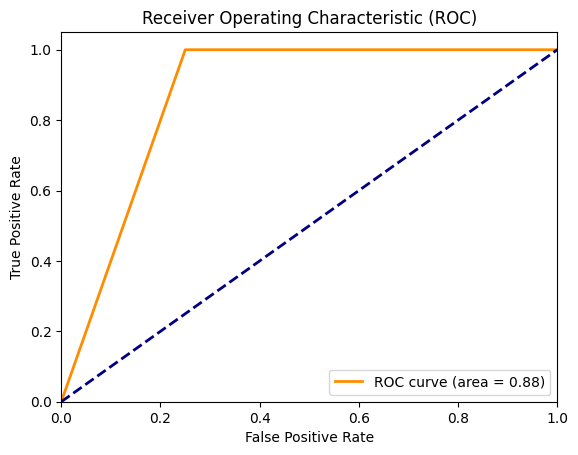

Sensitivity: 1.000
AUC: 0.875


In [ ]:
#when the average is taken for both False tract fistula value for mean TN, FN , TP , FP.
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Updated values
TP = 4
FN = 0
TN = 12
FP = 4


# Sensitivity and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Plotting the ROC curve
# For simplicity, let's use these values as the ROC points
fpr = [0, 1 - specificity, 1]  # False Positive Rate
tpr = [0, sensitivity, 1]      # True Positive Rate

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Print Sensitivity and AUC
print(f"Sensitivity: {sensitivity:.3f}")
print(f"AUC: {roc_auc:.3f}")

<ipython-input-23-4e7ccec0304d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ruf6[col], fit=norm, kde=False)


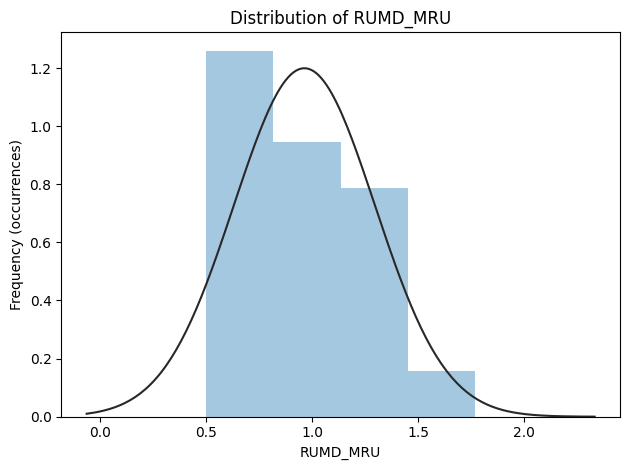

In [ ]:
# Plot distribution plots with normal distribution curve
columns_to_plot = ruf6.columns[:-1]  # Exclude 'False_tract_fistula'

# plt.figure(figsize=(10, 20))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)  # Create a vertical layout
    sns.distplot(ruf6[col], fit=norm, kde=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency (occurrences)')

plt.tight_layout()
plt.show()